# Customer Segmentation in Marketing with Python Project
### Qui: e-learning platform
### questioons: 
### 1- Dans quelle mesure le canal d’acquisition de la plateforme influence-t-il les résultats d’apprentissage des étudiants ?
### 2- Y a-t-il des zones géographiques où la plupart de nos étudiants découvrent la plateforme ?

In [1]:
import numpy as np
import pandas as pd

### customer_segmentation_data

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [3]:
df['channel'].unique()

array([4, 1, 2, 3, 8, 6, 7, 5], dtype=int64)

### Segmentation data legend

In [4]:
df1 = pd.read_excel('Segmentation data legend.xlsx')
df1.head()

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of student information of...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,minutes watched,numerical,Integer,The number of minutes a student has watched si...
4,NaN,NaN,NaN,NaN,NaN


In [5]:
df1['Unnamed: 4'].unique()

array([nan, 'Description',
       'The number of minutes a student has watched since joining the program',
       'The Customer Lifetime Value, or CLV, shows the total amount of revenue generated by that customer',
       'This is the geographical region where the student comes from.',
       'USA, Canada, United Kingdom, Australia', 'Western Europe',
       'Rest of the World',
       'This is the channel through which the customer has learned about the 365 program',
       'Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter',
       'Instagram', 'Friend', 'Other'], dtype=object)

In [6]:
df_filtered = df1[df1['Unnamed: 4'].isin(['Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter', 'Instagram','Friend'])][['Unnamed: 3', 'Unnamed: 4']]

In [7]:
df_filtered

,Unnamed: 3,Unnamed: 4
14,1,Google
15,2,Facebook
16,3,YouTube
17,4,LinkedIn
18,5,Twitter
19,6,Instagram
20,7,Friend


In [8]:
new_row = pd.DataFrame({"Unnamed: 3": [8], "Unnamed: 4": ["Other"]})
df_filtered = pd.concat([df_filtered, new_row], ignore_index=True)

df_filtered

,Unnamed: 3,Unnamed: 4
0,1,Google
1,2,Facebook
2,3,YouTube
3,4,LinkedIn
4,5,Twitter
5,6,Instagram
6,7,Friend
7,8,Other


In [9]:
df_region = df1[df1['Unnamed: 4'].isin(['USA, Canada, United Kingdom, Australia', 'Western Europe','Rest of the World'])][['Unnamed: 3', 'Unnamed: 4']]

In [10]:
df_region.head()

,Unnamed: 3,Unnamed: 4
9,0,"USA, Canada, United Kingdom, Australia"
10,1,Western Europe
11,2,Rest of the World


In [11]:
df.shape

(3834, 4)

In [12]:
df.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

In [13]:
df.isna().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [14]:
df.fillna(0,inplace=True)

In [15]:
df.isna().sum()

minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

In [16]:
df.duplicated().sum()

49

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df['region'].unique()

array([2, 0, 1], dtype=int64)

In [20]:
df['channel'].unique()

array([4, 1, 2, 3, 8, 6, 7, 5], dtype=int64)

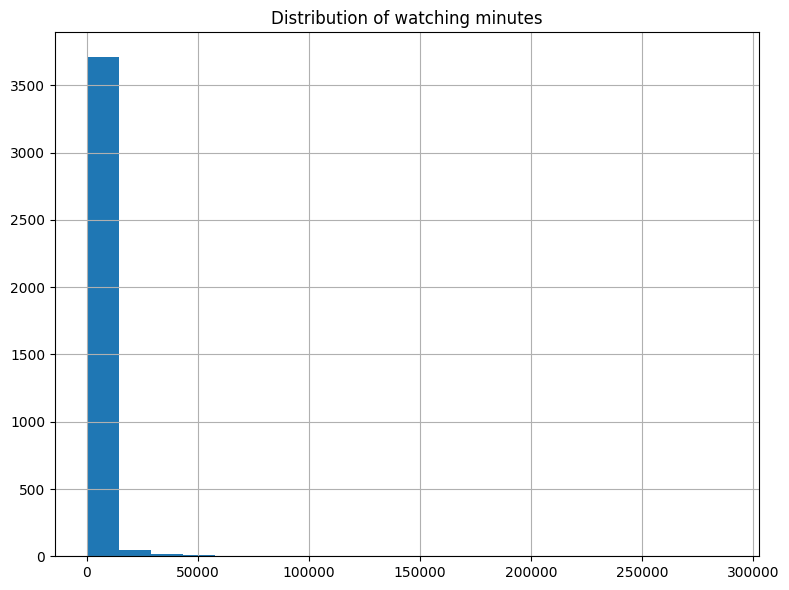

In [21]:
import matplotlib.pyplot as plt

df['minutes_watched'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of watching minutes')

plt.tight_layout()
plt.show()


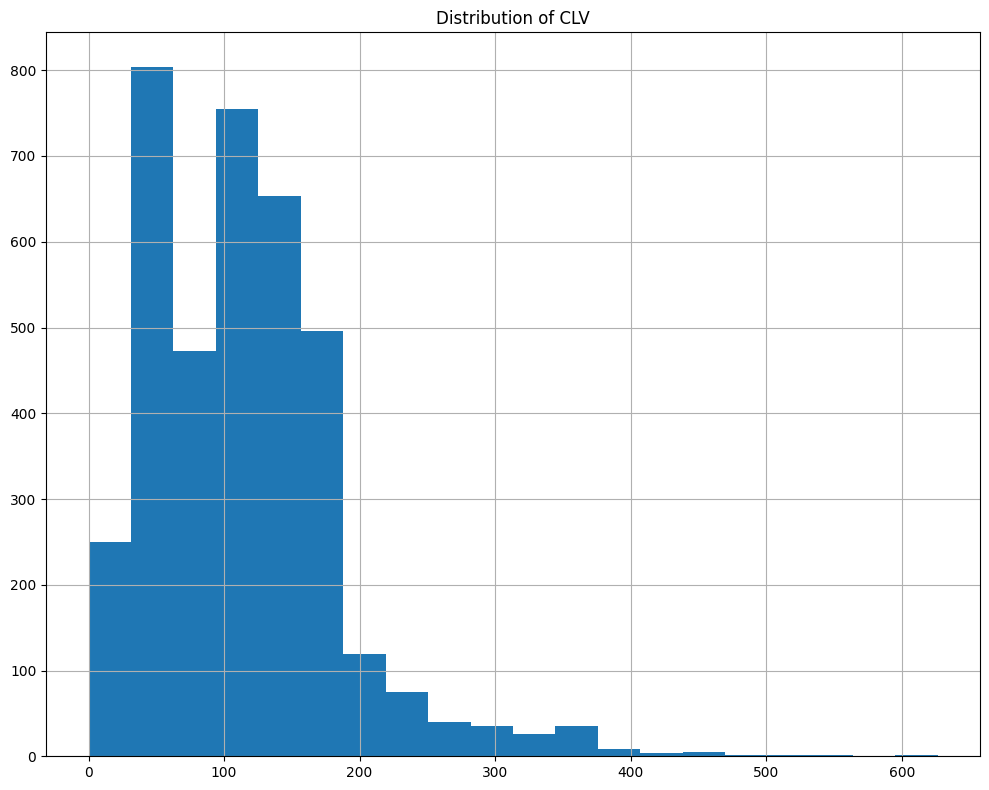

In [22]:
import matplotlib.pyplot as plt

df['CLV'].hist(bins=20, figsize=(10, 8))
plt.tight_layout()

plt.title('Distribution of CLV')

plt.tight_layout()
plt.show()
plt.show()

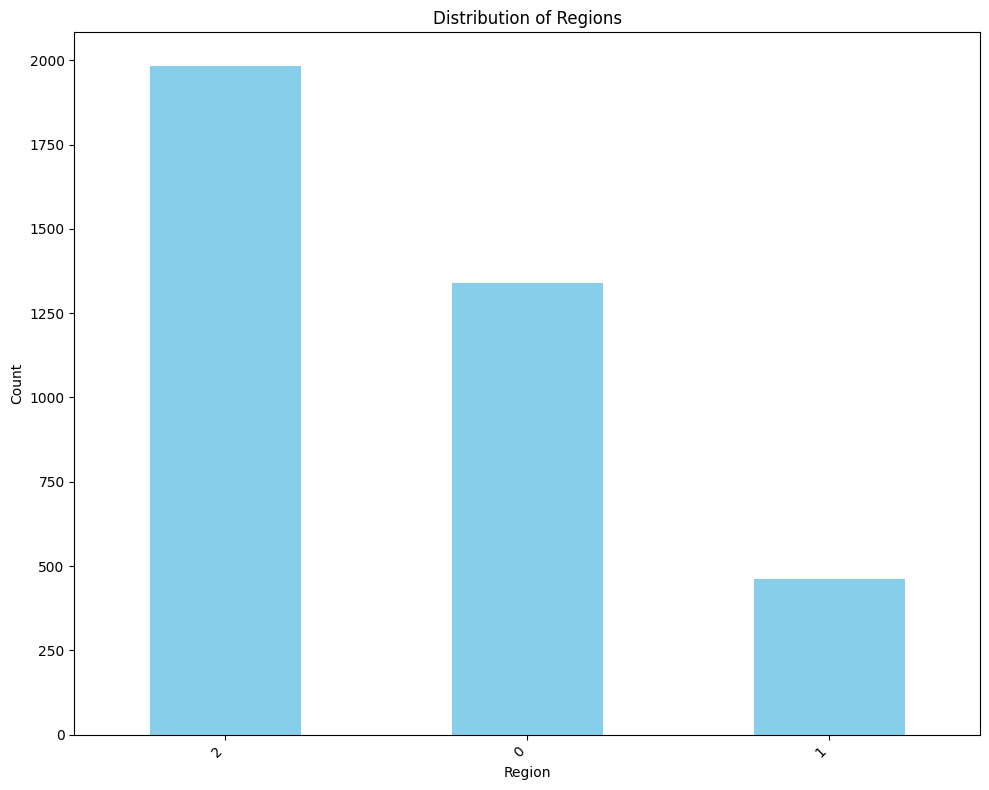

In [23]:

plt.figure(figsize=(10, 8))  
df['region'].value_counts().plot(kind='bar', color='skyblue') 

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

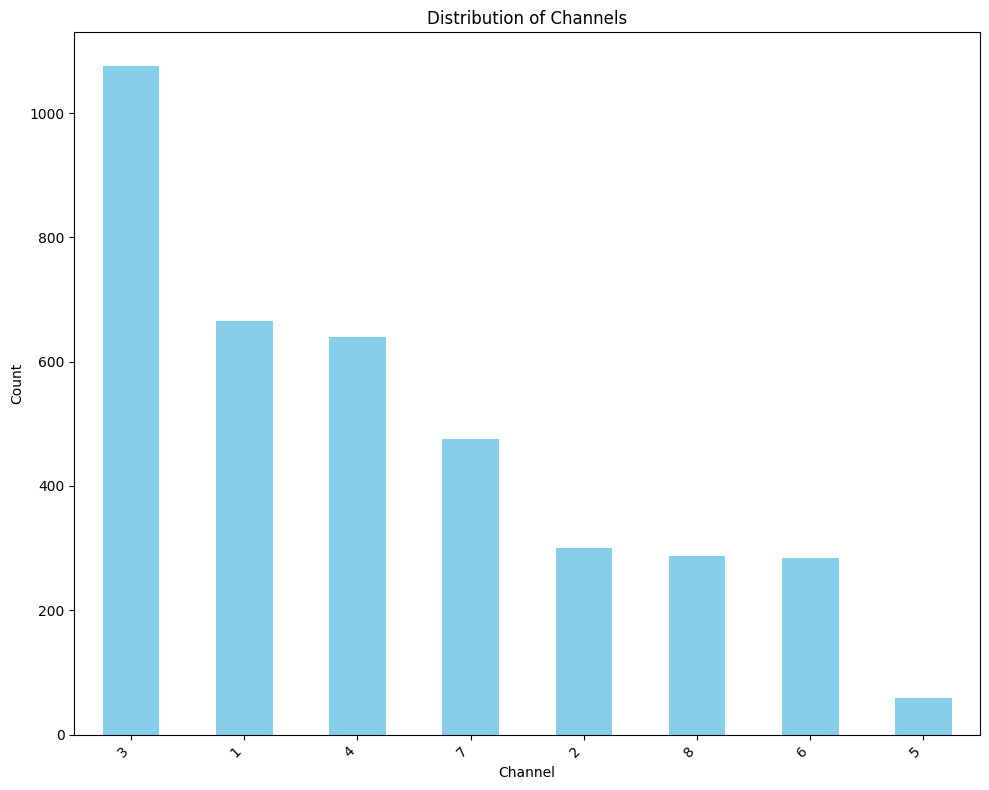

In [24]:
plt.figure(figsize=(10, 8))  
df['channel'].value_counts().plot(kind='bar', color='skyblue') 

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Distribution of Channels')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

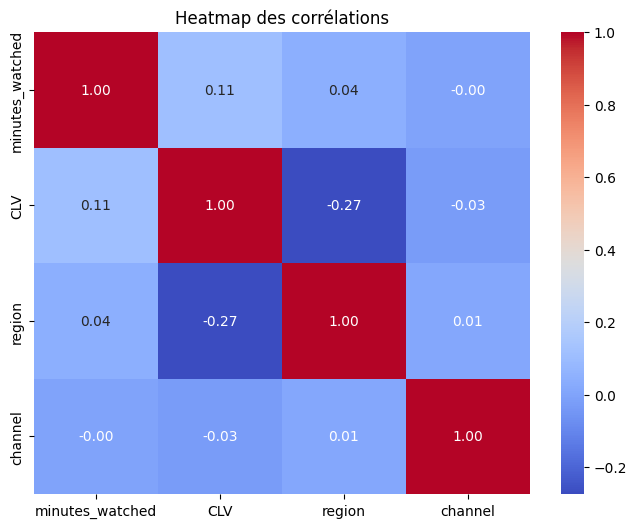

In [25]:
correlation_matrix = df.corr()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()


In [26]:
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['minutes_watched', 'CLV']] = scaler.fit_transform(df[['minutes_watched', 'CLV']])

In [28]:
from sklearn.cluster import KMeans

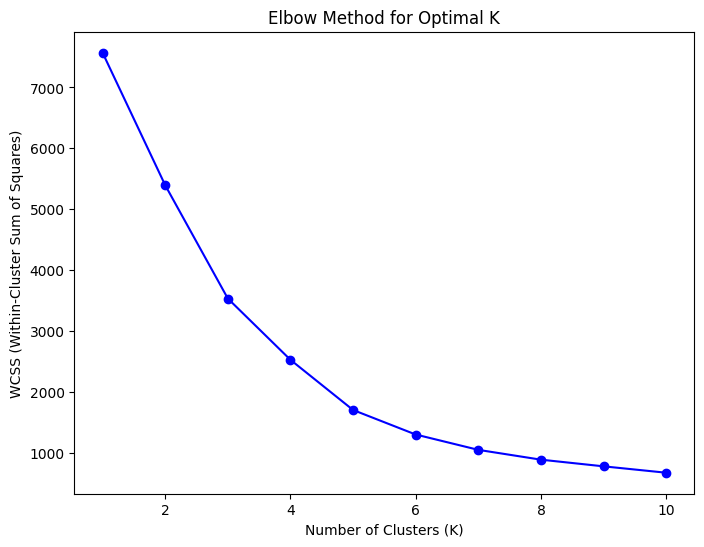

In [29]:
k_range = range(1, 11)  
wcss = []  

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['minutes_watched', 'CLV']])  
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [32]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['minutes_watched', 'CLV']])



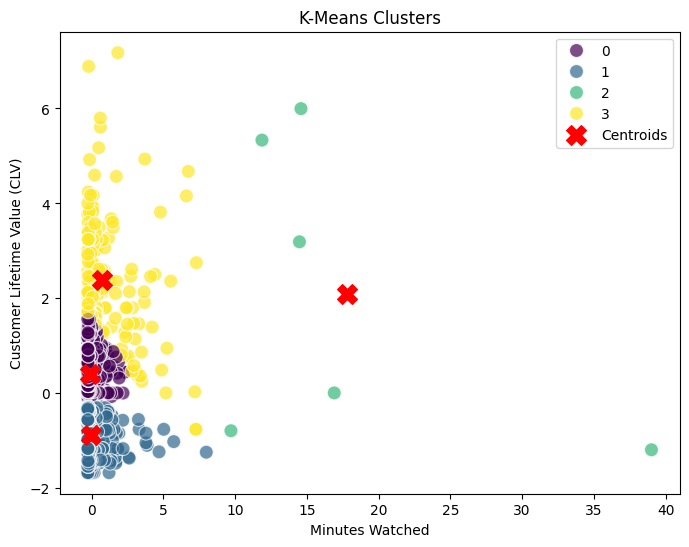

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minutes_watched', y='CLV', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clusters')
plt.xlabel('Minutes Watched')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.legend()
plt.show()

### les statistiques par cluster

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_7972\3485382091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='minutes_watched', data=df, palette='viridis')


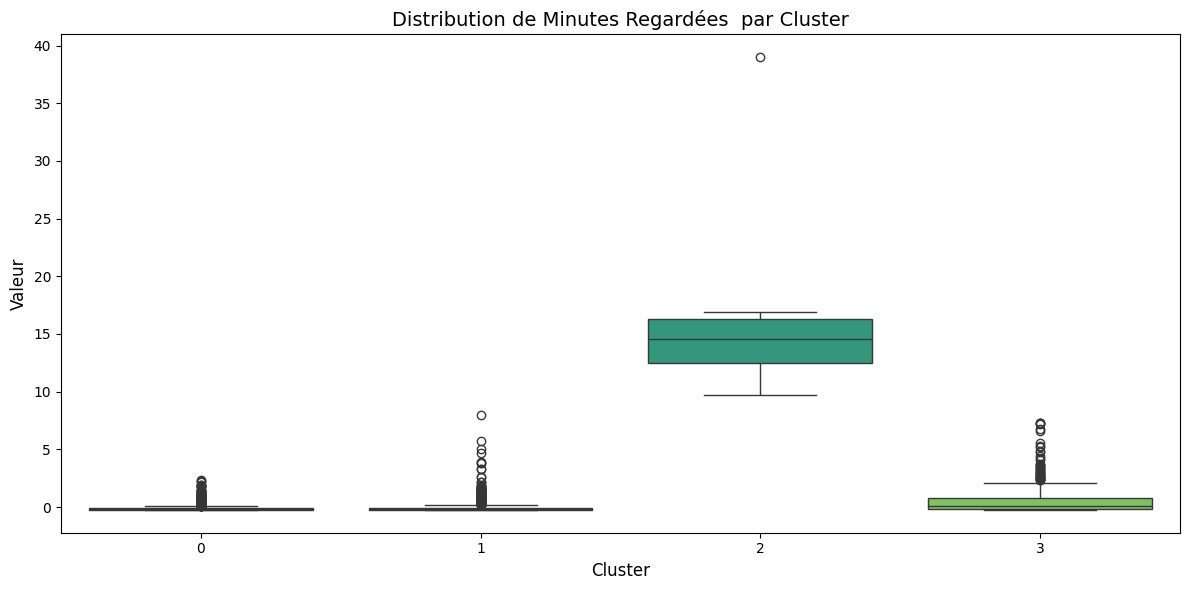

In [34]:
import seaborn as sns

# Créer un boxplot pour 'minutes_watched' et 'CLV' par cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='minutes_watched', data=df, palette='viridis')

plt.title('Distribution de Minutes Regardées  par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Valeur', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


On observe que le cluster 2 présente le temps de visionnage médian le plus élevé, suivi du cluster 1. Le cluster 3 se distingue par un temps de visionnage très faible et très concentré, tandis que le cluster 0 affiche un temps de visionnage minimal et une grande dispersion des valeurs. 

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_7972\2677729126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CLV', data=df, palette='viridis')


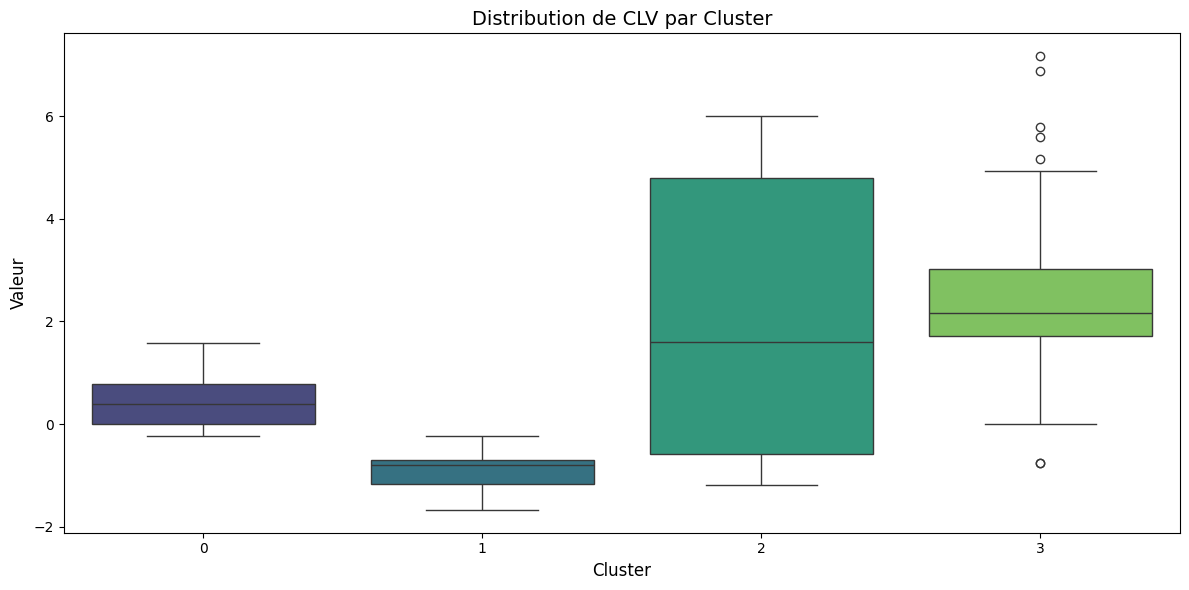

In [35]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='CLV', data=df, palette='viridis')

plt.title('Distribution de CLV par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Valeur', fontsize=12)

plt.tight_layout()
plt.show()


 Le cluster 2 regroupe les clients les plus précieux,aussi le cluster 3, tandis que les clusters 0 et 1 correspondent à des clients moins rentables.

### On déduit que le cluster 2, qui se distingue par un temps de visionnage élevé et une CLV élevée, représente un segment très intéressant à cibler avec des contenus exclusifs et des offres personnalisées.

## ldistribution des canaux dans chaque cluster

In [36]:
channel_mapping = dict(zip(df_filtered["Unnamed: 3"], df_filtered["Unnamed: 4"]))
df["channel"] = df["channel"].map(channel_mapping)
df.head()

,minutes_watched,CLV,region,channel,Cluster
0,0.171177,1.226793,2,LinkedIn,0
1,-0.255436,0.443581,0,Google,0
2,-0.181657,0.005701,2,Facebook,0
3,-0.261289,1.715399,2,LinkedIn,3
4,-0.230661,0.929220,1,LinkedIn,0


<Figure size 1000x600 with 0 Axes>

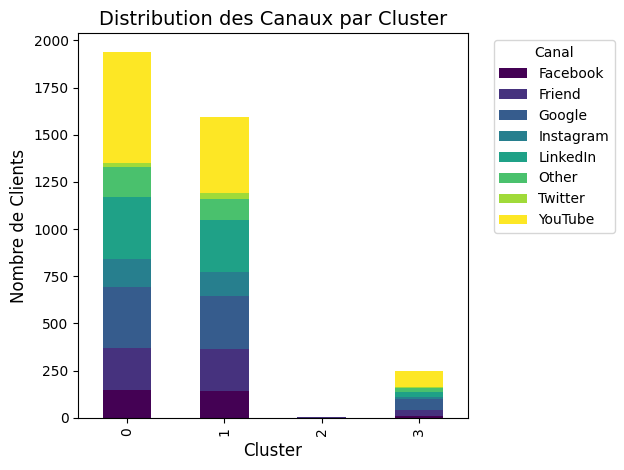

In [37]:
import seaborn as sns

channel_distribution = df.groupby('Cluster')['channel'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution des Canaux par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)

plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Le graphique illustre la distribution des canaux d'acquisition par cluster de clients. On observe que le canal YouTube est le plus utilisé dans tous les clusters, suivi de près par Facebook et Instagram. Le cluster 0 présente la plus grande diversité de canaux utilisés, tandis que le cluster 3 se concentre principalement sur YouTube. Les autres canaux, comme LinkedIn ou Twitter, semblent moins populaires dans l'ensemble. 

In [38]:
channel_mapping = dict(zip(df_region["Unnamed: 3"], df_region["Unnamed: 4"]))
df["region"] = df["region"].map(channel_mapping)
df.head()

,minutes_watched,CLV,region,channel,Cluster
0,0.171177,1.226793,Rest of the World,LinkedIn,0
1,-0.255436,0.443581,"USA, Canada, United Kingdom, Australia",Google,0
2,-0.181657,0.005701,Rest of the World,Facebook,0
3,-0.261289,1.715399,Rest of the World,LinkedIn,3
4,-0.230661,0.929220,Western Europe,LinkedIn,0


<Figure size 1000x800 with 0 Axes>

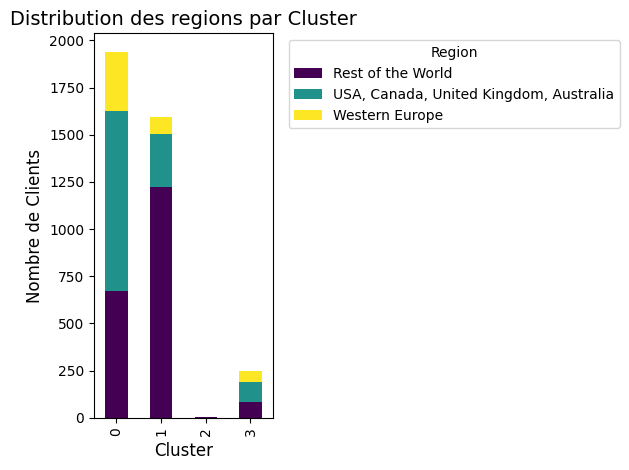

In [39]:
import seaborn as sns

channel_distribution = df.groupby('Cluster')['region'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
channel_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution des regions par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


On observe que le cluster 0 regroupe principalement des clients du reste du monde et d'Amérique du Nord, tandis que le cluster 1 concentre un nombre important de clients d'Europe occidentale. Les clusters 2 et 3 ont des effectifs plus faibles et semblent avoir une répartition géographique plus diversifiée. 

# Le cluster 2, fortement lié à Facebook et à la Région du de Reste du monde , présente un potentiel élevé. Il serait très important que l'entreprise intensifie ces efforts sur cette plateforme (Facebook) et dans la Région du de Reste du monde.